# Lab08_108032053

## 1. Download data

In [13]:
# inline plotting instead of popping out
%matplotlib inline

import os, csv
import numpy as np
import pandas as pd
from sklearn import datasets
load_iris = datasets.load_iris
make_moons = datasets.make_moons
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, VotingClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score, mean_squared_error, roc_curve, auc
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [30]:
DOWNLOAD_URL_1 = "https://drive.google.com/u/1/uc?id=1VlCzAlZr9YKBETlCQwcrLiZSdnsA7wR_&export=download"
DOWNLOAD_URL_2 = "https://drive.google.com/u/1/uc?id=18gqruUR2Ds3PkrrtOg-uiaxC_prDmySA&export=download"

if not os.path.exists("test.csv"):
    try:
        import gdown
        gdown.download(DOWNLOAD_URL_1, "test.csv")
        print("Donwload test.csv successfully.")
    except:
        print("Can't download the file.")

if not os.path.exists("train.csv"):
    try:
        import gdown
        gdown.download(DOWNLOAD_URL_2, "train.csv")
        print("Donwload train.csv successfully.")
    except:
        print("Can't download the file.")

Downloading...
From: https://drive.google.com/u/1/uc?id=1VlCzAlZr9YKBETlCQwcrLiZSdnsA7wR_&export=download
To: /content/test.csv
100%|██████████| 8.39k/8.39k [00:00<00:00, 7.05MB/s]


Donwload test.csv successfully.


Downloading...
From: https://drive.google.com/u/1/uc?id=18gqruUR2Ds3PkrrtOg-uiaxC_prDmySA&export=download
To: /content/train.csv
100%|██████████| 33.3k/33.3k [00:00<00:00, 39.1MB/s]

Donwload train.csv successfully.


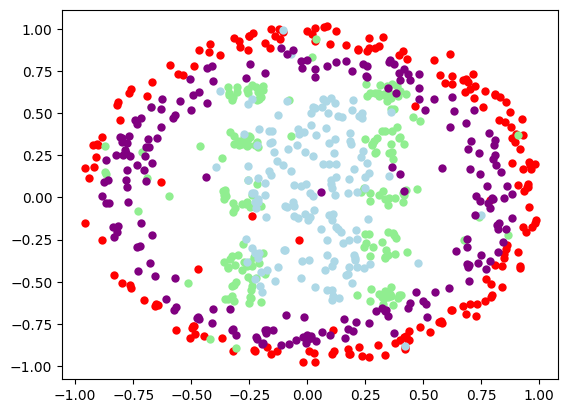

In [14]:
file = open('./train.csv', encoding='utf-8')
reader = csv.reader(file)
next(reader)
X = np.ndarray((0, 2))
y = np.ndarray((0,))
y_mapping = {'Bob': 0, 'Kate': 1, 'Mark': 2, 'Sue': 3}
i = 0
for row in reader:
    i += 1
    X = np.vstack((X, np.array(row[0:2])))
    y = np.append(y, y_mapping[row[2]])
X = X.astype(float)
y = y.astype(float)
file.close()

plt.scatter(X[y == 0, 0], X[y == 0, 1], label='Bob', c='red', linewidths=0)
plt.scatter(
    X[y == 1, 0], X[y == 1, 1], label='Kate', c='lightgreen', linewidths=0)
plt.scatter(
    X[y == 2, 0], X[y == 2, 1], label='Mark', c='lightblue', linewidths=0)
plt.scatter(X[y == 3, 0], X[y == 3, 1], label='Sue', c='purple', linewidths=0)

X_train, y_train = X, y

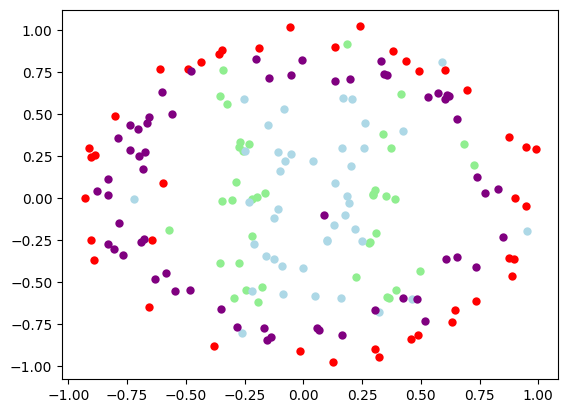

In [15]:
file = open('./test.csv', encoding='utf-8')
reader = csv.reader(file)
next(reader)
X = np.ndarray((0, 2))
y = np.ndarray((0,))
y_mapping = {'Bob': 0, 'Kate': 1, 'Mark': 2, 'Sue': 3}
i = 0
for row in reader:
    i += 1
    X = np.vstack((X, np.array(row[0:2])))
    y = np.append(y, y_mapping[row[2]])
X = X.astype(float)
y = y.astype(float)
file.close()

plt.scatter(X[y == 0, 0], X[y == 0, 1], label='Bob', c='red', linewidths=0)
plt.scatter(
    X[y == 1, 0], X[y == 1, 1], label='Kate', c='lightgreen', linewidths=0)
plt.scatter(
    X[y == 2, 0], X[y == 2, 1], label='Mark', c='lightblue', linewidths=0)
plt.scatter(X[y == 3, 0], X[y == 3, 1], label='Sue', c='purple', linewidths=0)

X_test, y_test = X, y

In [16]:
# Standardization
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

## 2. Model

### 2.1 LogisticRegression

In [17]:
param_penalty = ['l1', 'l2', 'elasticnet', None]
param_C = [0.1, 1.0, 10.0, 100.0, 1000.0]
param_solver = ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']

model = LogisticRegression(random_state=0)

param_grid = [{
    'penalty': param_penalty,
    'C': param_C,
    'solver': param_solver,
}]
gs = GridSearchCV(estimator=model,
                  param_grid=param_grid,
                  scoring='accuracy')

gs = gs.fit(X_train_std, y_train)
print('[Best LogisticRegression Model]')
print(f'Best score: {gs.best_score_: .2f}')
print(f'Best params: {gs.best_params_}')

best_lr = gs.best_estimator_
best_lr.fit(X_train_std, y_train)
y_test_pred = best_lr.predict(X_test_std)

accuracy = accuracy_score(y_test, y_test_pred)
print(f'Test accuracy: {accuracy: .2f}')

[Best LogisticRegression Model]
Best score:  0.28
Best params: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cholesky'}
Test accuracy:  0.27


### 2.2 DecisionTree

In [18]:
param_criterion = ['gini', 'entropy', 'log_loss']
param_max_depth = [None, 1, 2, 3, 4, 5, 6, 8, 10]
param_splitter = ['best', 'random']

model = DecisionTreeClassifier(random_state=0)

param_grid = [{
    'criterion': param_criterion,
    'max_depth': param_max_depth,
    'splitter': param_splitter,
}]
gs = GridSearchCV(estimator=model,
                  param_grid=param_grid,
                  scoring='accuracy')

gs = gs.fit(X_train_std, y_train)
print('[Best DecisionTree Model]')
print(f'Best score: {gs.best_score_: .2f}')
print(f'Best params: {gs.best_params_}')

best_dt = gs.best_estimator_
best_dt.fit(X_train_std, y_train)
y_test_pred = best_dt.predict(X_test_std)

accuracy = accuracy_score(y_test, y_test_pred)
print(f'Test accuracy: {accuracy: .2f}')

[Best DecisionTree Model]
Best score:  0.79
Best params: {'criterion': 'gini', 'max_depth': 8, 'splitter': 'best'}
Test accuracy:  0.79


### 2.3 KNN

In [19]:
param_n_neighbors = [1, 2, 3, 4, 6, 8, 10]
param_algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
param_leaf_size = [10, 20, 30, 40, 50]

model = KNeighborsClassifier()

param_grid = [{
    'n_neighbors': param_n_neighbors,
    'algorithm': param_algorithm,
    'leaf_size': param_leaf_size,
}]
gs = GridSearchCV(estimator=model,
                  param_grid=param_grid,
                  scoring='accuracy')

gs = gs.fit(X_train_std, y_train)
print('[Best KNN Model]')
print(f'Best score: {gs.best_score_: .2f}')
print(f'Best params: {gs.best_params_}')

best_knn = gs.best_estimator_
best_knn.fit(X_train_std, y_train)
y_test_pred = best_knn.predict(X_test_std)

accuracy = accuracy_score(y_test, y_test_pred)
print(f'Test accuracy: {accuracy: .2f}')

[Best KNN Model]
Best score:  0.83
Best params: {'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 3}
Test accuracy:  0.79


## 3. Ensemble

### 3.1 Voting

In [20]:
param_voting = ['hard', 'soft']
param_weights = [(1, 1), (1, 2), (2, 1), (1, 3), (3, 1)]

estimators = [('dt', best_dt), ('knn', best_knn)]
model = VotingClassifier(estimators=estimators)

param_grid = [{
    'voting': param_voting,
    'weights': param_weights,
}]
gs = GridSearchCV(estimator=model,
                  param_grid=param_grid,
                  scoring='accuracy')

gs = gs.fit(X_train_std, y_train)
print('[Best Voting Model]')
print(f'Best score: {gs.best_score_: .2f}')
print(f'Best params: {gs.best_params_}')

best_voting = gs.best_estimator_
best_voting.fit(X_train_std, y_train)
y_test_pred = best_voting.predict(X_test_std)

accuracy = accuracy_score(y_test, y_test_pred)
print(f'Test accuracy: {accuracy: .2f}')

[Best Voting Model]
Best score:  0.84
Best params: {'voting': 'soft', 'weights': (1, 3)}
Test accuracy:  0.79


### 3.2 Bagging

In [21]:
param_estimator = [best_dt, best_knn]
param_n_estimators = [5, 10, 50, 100]

model = BaggingClassifier(random_state=0,
                          max_samples=0.7, bootstrap=True,
                          max_features=1.0, bootstrap_features=False,)

param_grid = [{
    'estimator': param_estimator,
    'n_estimators': param_n_estimators,
}]
gs = GridSearchCV(estimator=model,
                  param_grid=param_grid,
                  scoring='accuracy')

gs = gs.fit(X_train_std, y_train)
print('[Best Bagging Model]')
print(f'Best score: {gs.best_score_: .2f}')
print(f'Best params: {gs.best_params_}')

best_bagging = gs.best_estimator_
best_bagging.fit(X_train_std, y_train)
y_test_pred = best_bagging.predict(X_test_std)

accuracy = accuracy_score(y_test, y_test_pred)
print(f'Test accuracy: {accuracy: .2f}')

[Best Bagging Model]
Best score:  0.84
Best params: {'estimator': KNeighborsClassifier(leaf_size=10, n_neighbors=3), 'n_estimators': 100}
Test accuracy:  0.79


### 3.3 Boosting

In [22]:
param_estimator = [best_dt, best_knn]
param_n_estimators = [5, 10, 50, 100]

model = AdaBoostClassifier(random_state=0)

param_grid = [{
    'estimator': param_estimator,
    'n_estimators': param_n_estimators,
}]
gs = GridSearchCV(estimator=model,
                  param_grid=param_grid,
                  scoring='accuracy')

gs = gs.fit(X_train_std, y_train)
print('[Best Boosting Model]')
print(f'Best score: {gs.best_score_: .2f}')
print(f'Best params: {gs.best_params_}')

best_boosting = gs.best_estimator_
best_boosting.fit(X_train_std, y_train)
y_test_pred = best_boosting.predict(X_test_std)

accuracy = accuracy_score(y_test, y_test_pred)
print(f'Test accuracy: {accuracy: .2f}')

[Best Boosting Model]
Best score:  0.83
Best params: {'estimator': DecisionTreeClassifier(max_depth=8, random_state=0), 'n_estimators': 50}
Test accuracy:  0.82


## 4. Report

首先我先分別對 `LogisticRegression`, `DecisionTreeClassifier`, `KNeighborsClassifier` 這 3 個 model 用 `GridSearchCV` 找出最好的 hyperparameter，每個 model 都挑選出 2-3 個重要的參數來做嘗試，結果的 testing accuracy 分別為 0.27, 0.79, 0.79，可以看到 `LogisticRegression` 的準確率最差，因為這種環狀的分佈很難使用 linear model 來找到一個 hyperplane 來做分類，而另外兩個 model 則是表現的差不多好，因此接下來的 ensemble 只使用這兩個 model，去除掉了表現太差的 `LogisticRegression`。

在 ensemble 的部分與前面很相似，只是改成分別對 `VotingClassifier`, `BaggingClassifier`, `AdaBoostClassifier` 這 3 個 model 用 `GridSearchCV` 找出他們最好的 hyperparameter，對於 voting 的共同參數是 estimators 都是 decision tree 和 knn，而對於 bagging 和 adaboost 則是會去分別嘗試使用 decision tree 和 knn 作為 estimator，最後的 testing accuracy 分別為 0.79, 0.79, 0.82，因此表現最好的 model 為 `AdaBoostClassifier`，其參數為 `{'estimator': DecisionTreeClassifier(max_depth=8, random_state=0), 'n_estimators': 50}`。